# General Model Comparison

In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cqiforecasting.configs.config import CFGLog
from cqiforecasting.dataloader.nn_data_loader import NNDataLoader
from cqiforecasting.utils.config import Config
from cqiforecasting.executor.inferer import Inferer
from sklearn.metrics import mean_absolute_error

In [3]:
SEQ_LENGTH = 80
BATCH_SIZE = 64
EPOCHS = 55


In [4]:
data_loader = NNDataLoader(Config.from_json(CFGLog).data)

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = data_loader.load_sequences(SEQ_LENGTH, 1, scale=False)

In [6]:
X_test.shape

(460, 80, 1)

## LSTM Model

In [24]:
from cqiforecasting.models.lstm_model import LSTMModel

In [25]:
lstm_model = LSTMModel(SEQ_LENGTH, CFGLog)

In [26]:
lstm_model.build()

In [27]:
lstm_model.load_data()

In [28]:
lstm_model.X_test.shape

(460, 80, 1)

In [29]:
history = lstm_model.train(BATCH_SIZE, EPOCHS)

Epoch 1/55


39/39 [==============================] - 8s 147ms/step - loss: 0.0698 - mae: 0.2962 - val_loss: 0.0194 - val_mae: 0.1590
Epoch 2/55
39/39 [==============================] - 4s 107ms/step - loss: 0.0196 - mae: 0.1608 - val_loss: 0.0183 - val_mae: 0.1557
Epoch 3/55
39/39 [==============================] - 4s 98ms/step - loss: 0.0191 - mae: 0.1584 - val_loss: 0.0180 - val_mae: 0.1540
Epoch 4/55
39/39 [==============================] - 4s 101ms/step - loss: 0.0189 - mae: 0.1567 - val_loss: 0.0182 - val_mae: 0.1552
Epoch 5/55
39/39 [==============================] - 6s 144ms/step - loss: 0.0189 - mae: 0.1564 - val_loss: 0.0176 - val_mae: 0.1514
Epoch 6/55
39/39 [==============================] - 4s 101ms/step - loss: 0.0192 - mae: 0.1579 - val_loss: 0.0174 - val_mae: 0.1504
Epoch 7/55
39/39 [==============================] - 5s 125ms/step - loss: 0.0185 - mae: 0.1550 - val_loss: 0.0173 - val_mae: 0.1500
Epoch 8/55
39/39 [==============================] - 4s 105ms/step - loss: 0.0180 - mae: 

In [30]:
eval =  lstm_model.evaluate()

 1/15 [=>............................] - ETA: 1s - loss: 0.0154 - mae: 0.1422

15/15 [==============================] - 0s 26ms/step - loss: 0.0138 - mae: 0.1334


In [31]:
predictions = Inferer.infer(lstm_model._model, X_test)

(460, 80, 1)


15/15 [==============================] - 1s 16ms/step


In [32]:
time = np.arange(0, len(lstm_model.y_test), step=1)

In [33]:
lstm_model.X_test.shape

(460, 80, 1)

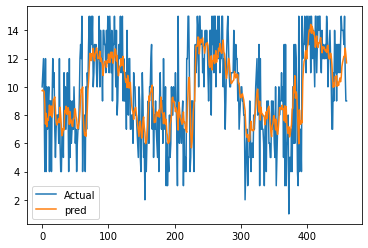

In [34]:
plt.plot(time, y_test, label="Actual")
plt.plot(time, predictions, label="pred")
plt.legend()
plt.show();


In [35]:
mean_absolute_error(predictions, y_test)

2.001159944741622

## Bi-LSTM Model

In [36]:
from cqiforecasting.models.bi_lstm_model import BiLSTMModel

In [37]:
bi_lstm_model = BiLSTMModel(SEQ_LENGTH, CFGLog)

In [38]:
bi_lstm_model.load_data()

In [39]:
bi_lstm_model.build()

In [40]:
bi_lstm_model.train(BATCH_SIZE, EPOCHS)

Epoch 1/55
39/39 [==============================] - 12s 184ms/step - loss: 0.2237 - val_loss: 0.0462
Epoch 2/55
39/39 [==============================] - 5s 133ms/step - loss: 0.0403 - val_loss: 0.0352
Epoch 3/55
39/39 [==============================] - 5s 140ms/step - loss: 0.0362 - val_loss: 0.0336
Epoch 4/55
39/39 [==============================] - 6s 158ms/step - loss: 0.0349 - val_loss: 0.0322
Epoch 5/55
39/39 [==============================] - 7s 176ms/step - loss: 0.0348 - val_loss: 0.0320
Epoch 6/55
39/39 [==============================] - 5s 138ms/step - loss: 0.0347 - val_loss: 0.0324
Epoch 7/55
39/39 [==============================] - 7s 170ms/step - loss: 0.0341 - val_loss: 0.0325
Epoch 8/55
39/39 [==============================] - 7s 173ms/step - loss: 0.0341 - val_loss: 0.0314
Epoch 9/55
39/39 [==============================] - 5s 127ms/step - loss: 0.0340 - val_loss: 0.0313
Epoch 10/55
39/39 [==============================] - 5s 128ms/step - loss: 0.0334 - val_loss: 0.033

In [41]:
bi_lstm_eval = bi_lstm_model.evaluate()

15/15 [==============================] - 0s 27ms/step - loss: 0.0288


In [42]:
predictions = Inferer.infer(bi_lstm_model._model, X_test)

(460, 80, 1)


15/15 [==============================] - 2s 98ms/step


In [43]:
time = np.arange(0, len(y_test), step=1)

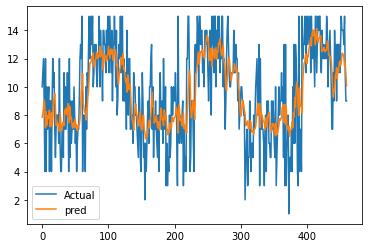

In [44]:
plt.plot(time, y_test, label="Actual")
plt.plot(time, predictions, label="pred")
plt.legend()
plt.show();


In [46]:
mean_absolute_error(predictions, y_test)

2.0458373878313147

## Conv Bi-LSTM Model

In [7]:
from cqiforecasting.models.conv_bi_lstm_model import ConvBiLSTMModel

2023-09-28 17:00:01.607759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-28 17:00:01.607782: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
conv_bi_lstm_model = ConvBiLSTMModel(SEQ_LENGTH, CFGLog)

In [9]:
conv_bi_lstm_model.load_data()

In [10]:
conv_bi_lstm_model.build()

2023-09-28 17:00:24.599081: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-09-28 17:00:24.599121: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ozi-Lenovo-Y50-70): /proc/driver/nvidia/version does not exist
2023-09-28 17:00:24.599442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
conv_bi_lstm_model.train(BATCH_SIZE, EPOCHS)

Epoch 1/55
39/39 [==============================] - 11s 152ms/step - loss: 0.1002 - mae: 0.3705 - val_loss: 0.0306 - val_mae: 0.2040
Epoch 2/55
39/39 [==============================] - 7s 183ms/step - loss: 0.0214 - mae: 0.1688 - val_loss: 0.0171 - val_mae: 0.1495
Epoch 3/55
39/39 [==============================] - 4s 116ms/step - loss: 0.0180 - mae: 0.1521 - val_loss: 0.0166 - val_mae: 0.1453
Epoch 4/55
39/39 [==============================] - 6s 154ms/step - loss: 0.0178 - mae: 0.1504 - val_loss: 0.0166 - val_mae: 0.1461
Epoch 5/55
39/39 [==============================] - 6s 164ms/step - loss: 0.0175 - mae: 0.1492 - val_loss: 0.0162 - val_mae: 0.1438
Epoch 6/55
39/39 [==============================] - 9s 234ms/step - loss: 0.0172 - mae: 0.1477 - val_loss: 0.0160 - val_mae: 0.1439
Epoch 7/55
39/39 [==============================] - 6s 161ms/step - loss: 0.0168 - mae: 0.1462 - val_loss: 0.0157 - val_mae: 0.1412
Epoch 8/55
39/39 [==============================] - 8s 200ms/step - loss: 0

In [15]:
conv_bi_lstm_eval = conv_bi_lstm_model.evaluate()

15/15 [==============================] - 0s 18ms/step - loss: 0.0122 - mae: 0.1251


In [16]:
predictions = Inferer.infer(conv_bi_lstm_model._model, X_test)

(460, 80, 1)
15/15 [==============================] - 1s 18ms/step


In [17]:
time = np.arange(0, len(y_test), step=1)

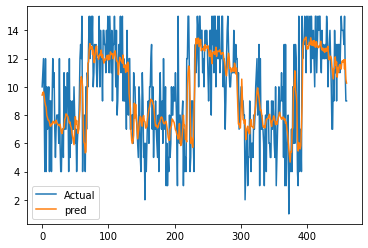

In [18]:
plt.plot(time, y_test, label="Actual")
plt.plot(time, predictions, label="pred")
plt.legend()
plt.show();

In [19]:
mean_absolute_error(predictions, y_test)

1.8764680302661398